<a href="https://colab.research.google.com/github/baochuong/Articial-Intelligence-AI-/blob/main/fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np

In [8]:
import skfuzzy as fuzz

In [9]:
import matplotlib.pyplot as plt


In [10]:
x = np.arange(50,81,1)

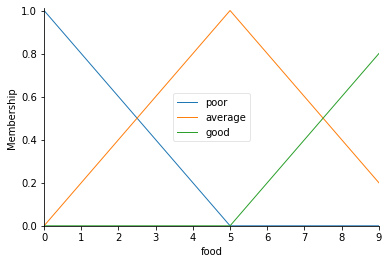

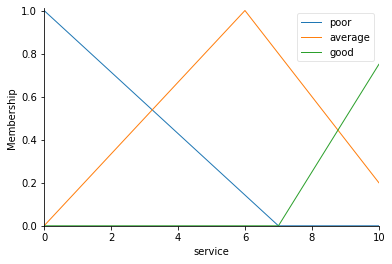

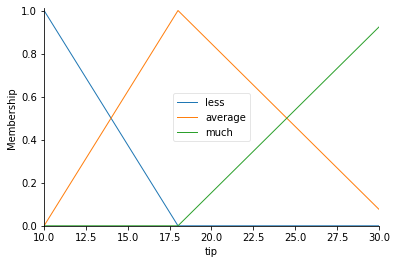

In [22]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

food = ctrl.Antecedent(np.arange(0,10,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[0,5,10])
food['good']= fuzz.trimf(food.universe,[5,10,10])

service['poor']= fuzz.trimf(service.universe,[0,0,7])
service['average']= fuzz.trimf(service.universe,[0,6,11])
service['good']= fuzz.trimf(service.universe,[7,11,11])

tip['less']= fuzz.trimf(tip.universe,[10,10,18])
tip['average']= fuzz.trimf(tip.universe,[10,18,31])
tip['much']= fuzz.trimf(tip.universe,[18,31,31])

food.view()
service.view()
tip.view()



22.889100529100528


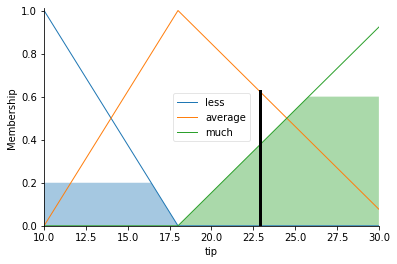

In [25]:
rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule4 = ctrl.Rule(food['average'] & service['average'], tip['less'])
rule5 = ctrl.Rule(food['good'] & service['poor'], tip['average'])
rule6 = ctrl.Rule(food['poor'] & service['good'], tip['average'])
rule7 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule8 = ctrl.Rule(food['average'] & service['good'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=9
tipping.input['service']=8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

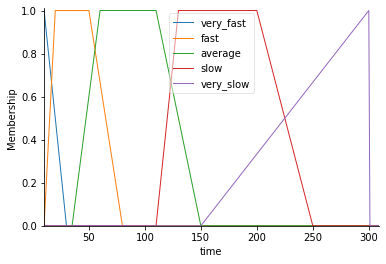

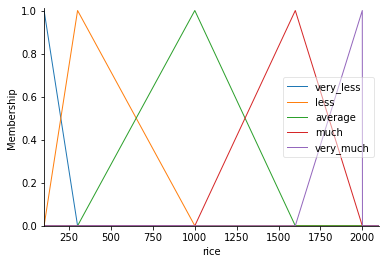

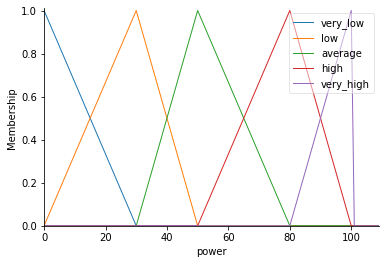

In [60]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

time = ctrl.Antecedent(np.arange(10,310,1),'time')
rice = ctrl.Antecedent(np.arange(100,2100,1),'rice')
power = ctrl.Consequent(np.arange(0,110,1),'power')

time['very_fast']= fuzz.trimf(time.universe,[10,10,30])
time['fast']= fuzz.trapmf(time.universe,[10,20,50,80])
time['average']= fuzz.trapmf(time.universe,[35,60,110,150])
time['slow']= fuzz.trapmf(time.universe,[110,130,200,250])
time['very_slow']= fuzz.trimf(time.universe,[150,300,300])

rice['very_less']= fuzz.trimf(rice.universe,[100,100,300])
rice['less']= fuzz.trimf(rice.universe,[100,300,1000])
rice['average']= fuzz.trimf(rice.universe,[300,1000,1600])
rice['much']= fuzz.trimf(rice.universe,[1000,1600,2000])
rice['very_much']= fuzz.trimf(rice.universe,[1600,2000,2000])

power['very_low']= fuzz.trimf(power.universe,[0,0,30])
power['low']= fuzz.trimf(power.universe,[0,30,50])
power['average']= fuzz.trimf(power.universe,[30,50,80])
power['high']= fuzz.trimf(power.universe,[50,80,100])
power['very_high']= fuzz.trimf(power.universe,[80,100,100])

time.view()
rice.view()
power.view()

66.18066780961709


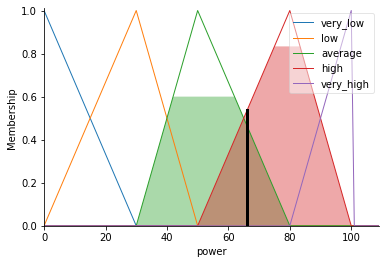

In [63]:
rule1 = ctrl.Rule(time['very_fast'] & rice['very_much'],power['very_high'])
rule2 = ctrl.Rule(time['fast'] & rice['very_much'],power['very_high'])
rule3 = ctrl.Rule(time['average'] & rice['very_much'],power['high'])
rule4 = ctrl.Rule(time['slow'] & rice['very_much'],power['average'])
rule5 = ctrl.Rule(time['very_slow'] & rice['very_much'],power['average'])

rule6 = ctrl.Rule(time['very_fast'] & rice['much'],power['very_high'])
rule7 = ctrl.Rule(time['fast'] & rice['much'],power['high'])
rule8 = ctrl.Rule(time['average'] & rice['much'],power['average'])
rule9 = ctrl.Rule(time['slow'] & rice['much'],power['average'])
rule10 = ctrl.Rule(time['very_slow']& rice['much'],power['average'])

rule11 = ctrl.Rule(time['very_fast'] & rice['average'],power['high'])
rule12 = ctrl.Rule(time['fast'] & rice['average'],power['average'])
rule13 = ctrl.Rule(time['average'] & rice['average'],power['average'])
rule14 = ctrl.Rule(time['slow'] & rice['average'],power['average'])
rule15 = ctrl.Rule(time['very_slow'] & rice['average'],power['low'])

rule16 = ctrl.Rule(time['very_fast'] & rice['less'],power['average'])
rule17 = ctrl.Rule(time['fast'] & rice['less'],power['average'])
rule18 = ctrl.Rule(time['average'] & rice['less'],power['average'])
rule19 = ctrl.Rule(time['slow'] & rice['less'],power['low'])
rule20 = ctrl.Rule(time['very_slow']& rice['less'],power['very_low'])

rule21 = ctrl.Rule(time['very_fast'] & rice['very_less'],power['low'])
rule22 = ctrl.Rule(time['fast'] & rice['very_less'],power['low'])
rule23 = ctrl.Rule(time['average'] & rice['very_less'],power['low'])
rule24 = ctrl.Rule(time['slow'] & rice['very_less'],power['very_low'])
rule25 = ctrl.Rule(time['very_slow'] & rice['very_less'],power['very_low'])

powerring_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powerring= ctrl.ControlSystemSimulation(powerring_ctrl)
powerring.input['time']=50
powerring.input['rice']=1500
powerring.compute()
print(powerring.output['power'])
power.view(sim=powerring)